c:\Users\heyia\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 998us/step - accuracy: 0.8619 - loss: 0.4693 - val_accuracy: 0.9592 - val_loss: 0.1377
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 958us/step - accuracy: 0.9663 - loss: 0.1130 - val_accuracy: 0.9718 - val_loss: 0.0973
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 972us/step - accuracy: 0.9766 - loss: 0.0741 - val_accuracy: 0.9687 - val_loss: 0.1054
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 966us/step - accuracy: 0.9833 - loss: 0.0555 - val_accuracy: 0.9750 - val_loss: 0.0875
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 1s 965us/step - accuracy: 0.9866 - loss: 0.0412 - val_accuracy: 0.9752 - val_loss: 0.0859
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 553us/step - accuracy: 0.9737 - loss: 0.0947
Test accuracy: 0.977400004863739


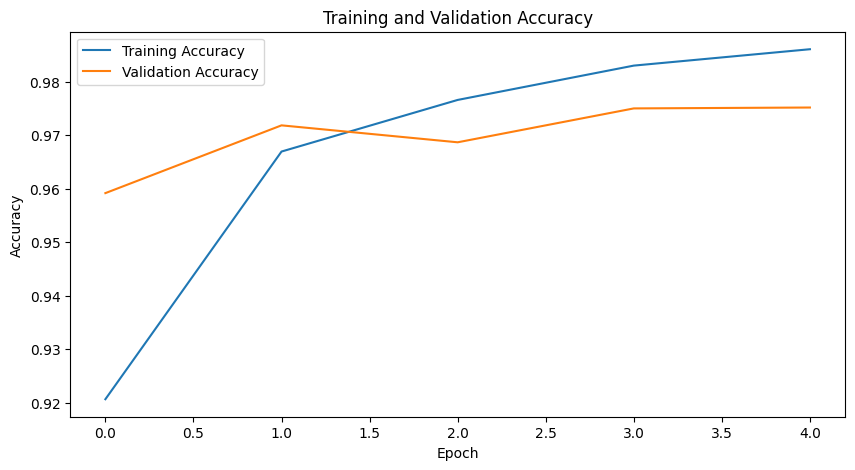

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train / 255.0

x_test = x_test / 255.0

# Flatten the images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model and store training history
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Plot the accuracy graph
plt.figure(figsize=(10, 5))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Add titles and labels
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.show()
